In [1]:
import os

# List all files in the current working directory
print(os.listdir())


['.ipynb_checkpoints', 'Alaram.ipynb', 'BMI CALCULATER.ipynb', 'CALCULATOR.ipynb', 'challenge.ipynb', 'CHATTER BOX.ipynb', 'DATA ANALYTICS PROJECT MALL_CUSTOMERS.ipynb', 'Downloads', 'EXPENSE TRACKER.ipynb', 'Mall_Customers.csv', 'music.py.ipynb', 'OOPS in PYTHON -INHERETENCE AND  POLYMORPHISM.ipynb', 'OOPS in PYTHON.ipynb', 'OOPS in Special Methods.ipynb', 'project-2 CARD.ipynb', 'PROJECT_2 DECK.ipynb', 'QUIZ GAME.ipynb', 'RANDOM PASSWORD GENERATOR.ipynb', 'SALES FORECASTING.ipynb', 'snake game.ipynb', 'STOPWATCH.ipynb', 'stores_sales_forecasting.csv', 'TO DO LIST.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Untitled7.ipynb', 'Untitled8.ipynb', 'Untitled9.ipynb', 'WEB scrapping.ipynb', 'WEBSITE SCRAPPER.ipynb', 'WHETHER REPORT.ipynb', '~$ an expert content reviewer.docx', '~$HIS Final shell.docx', '~WRL0088.tmp']


In [2]:
import os
print(os.getcwd())  # Prints the current working directory


C:\Users\Realme\Downloads


In [3]:
import pandas as pd

# Load the CSV file using the correct name
df = pd.read_csv(r"C:\Users\Realme\Downloads\Mall_Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop(columns=['CustomerID'])
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [6]:
df.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


C:\Users\Realme\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


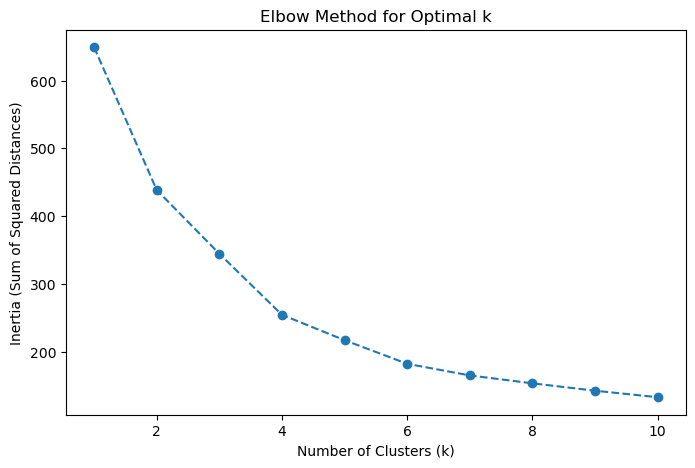

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking for k = 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)  # Sum of squared distances

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [9]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Display the first few rows with cluster labels
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,-1.424569,-1.738999,-0.434801,3
1,0,-1.281035,-1.738999,1.195704,0
2,1,-1.352802,-1.700830,-1.715913,3
3,1,-1.137502,-1.700830,1.040418,0
4,1,-0.563369,-1.662660,-0.395980,3


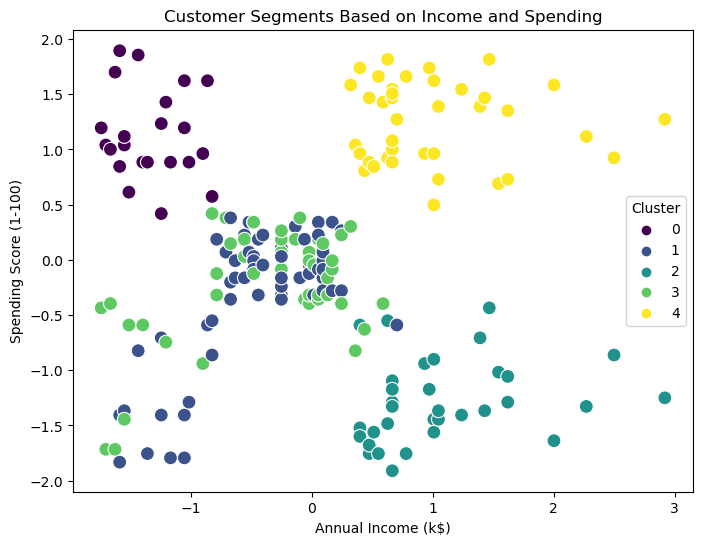

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments Based on Income and Spending')
plt.show()


In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.27
